# Ordinary Differential Equations Exercise 3

## Imports

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Damped, driven nonlinear pendulum

The equations of motion for a simple [pendulum](http://en.wikipedia.org/wiki/Pendulum) of mass $m$, length $l$ are:

$$
\frac{d^2\theta}{dt^2} = \frac{-g}{\ell}\sin\theta
$$

When a damping and periodic driving force are added the resulting system has much richer and interesting dynamics:

$$
\frac{d^2\theta}{dt^2} = \frac{-g}{\ell}\sin\theta - a \omega - b \sin(\omega_0 t)
$$

In this equation:

* $a$ governs the strength of the damping.
* $b$ governs the strength of the driving force.
* $\omega_0$ is the angular frequency of the driving force.

When $a=0$ and $b=0$, the energy/mass is conserved:

$$E/m =g\ell(1-\cos(\theta)) + \frac{1}{2}\ell^2\omega^2$$

### Basic setup

Here are the basic parameters we are going to use for this exercise:

In [6]:
g = 9.81   # m/s^2
l = 0.5    # length of pendulum, in meters
tmax = 50. # seconds
t = np.linspace(0, tmax, int(100*tmax))

Write a function `derivs` for usage with `scipy.integrate.odeint` that computes the derivatives for the damped, driven harmonic oscillator. The solution vector at each time will be $\vec{y}(t) = (\theta(t),\omega(t))$.

In [7]:
def derivs(y, t, a, b, omega0):
    """Compute the derivatives of the damped, driven pendulum.
    
    Parameters
    ----------
    y : ndarray
        The solution vector at the current time t[i]: [theta[i],omega[i]].
    t : float
        The current time t[i].
    a, b, omega0: float
        The parameters in the differential equation.
    
    Returns
    -------
    dy : ndarray
        The vector of derviatives at t[i]: [dtheta[i],domega[i]].
    """
    theta=y[0]
    omega=y[1]
    domega=-g*np.sin(theta)/1-a*omega-b*np.sin(omega0*t)
    dtheta=omega
    return np.array([dtheta,domega])
    """remember that omega is litterally the derivative of the angle formula
    like velocity is the derivative of position(it took me a while to figure 
    this out)"""

In [8]:
assert np.allclose(derivs(np.array([np.pi,1.0]), 0, 1.0, 1.0, 1.0), [1.,-1.])

In [9]:
def energy(y):
    """Compute the energy for the state array y.
    
    The state array y can have two forms:
    
    1. It could be an ndim=1 array of np.array([theta,omega]) at a single time.
    2. It could be an ndim=2 array where each row is the [theta,omega] at single
       time.
    
    Parameters
    ----------
    y : ndarray, list, tuple
        A solution vector
    
    Returns
    -------
    E/m : float (ndim=1) or ndarray (ndim=2)
        The energy per mass.
    """
    if y.ndim==1:
        theta=y[0]
        omega=y[1]
    elif y.ndim==2:
        theta=y[:,0]
        omega=y[:,1]
    return g*l*(1-np.cos(theta)) + 0.5*(l**2)*omega**2 

In [10]:
assert np.allclose(energy(np.array([np.pi,0])),g)
assert np.allclose(energy(np.ones((10,2))), np.ones(10)*energy(np.array([1,1])))

### Simple pendulum

Use the above functions to integrate the simple pendulum for the case where it starts at rest pointing vertically upwards. In this case, it should remain at rest with constant energy.

* Integrate the equations of motion.
* Plot $E/m$ versus time.
* Plot $\theta(t)$ and $\omega(t)$ versus time.
* Tune the `atol` and `rtol` arguments of `odeint` until $E/m$, $\theta(t)$ and $\omega(t)$ are constant.

Anytime you have a differential equation with a a conserved quantity, it is critical to make sure the numerical solutions conserve that quantity as well. This also gives you an opportunity to find other bugs in your code. The default error tolerances (`atol` and `rtol`) used by `odeint` are not sufficiently small for this problem. Start by trying `atol=1e-3`, `rtol=1e-2` and then decrease each by an order of magnitude until your solutions are stable.

In [11]:
thetai=np.pi
omegai=0
ic=np.array([thetai,omegai])
y=odeint(derivs,ic,t,args=(0.0,0.0,0.0),atol=1e-6,rtol=1e-5)

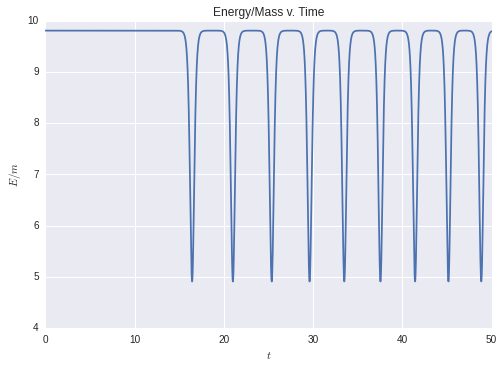

In [12]:
plt.plot(t,energy(y))
plt.xlabel('$t$')
plt.ylabel('$E/m$')
plt.title('Energy/Mass v. Time');

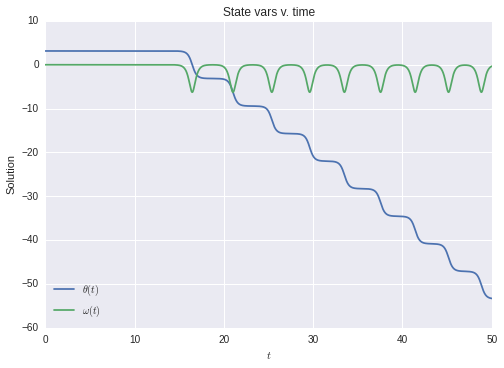

In [13]:
plt.plot(t, y[:,0], label='$\\theta(t)$')
plt.plot(t, y[:,1], label='$\omega(t)$')
plt.xlabel('$t$')
plt.ylabel('Solution')
plt.title('State vars v. time')
plt.legend(loc='best');

In [14]:
assert True # leave this to grade the two plots and their tuning of atol, rtol.

## Damped pendulum

Write a `plot_pendulum` function that integrates the damped, driven pendulum differential equation for a particular set of parameters $[a,b,\omega_0]$.

* Use the initial conditions $\theta(0)=-\pi + 0.1$ and $\omega=0$.
* Decrease your `atol` and `rtol` even futher and make sure your solutions have converged.
* Make a parametric plot of $[\theta(t),\omega(t)]$ versus time.
* Use the plot limits $\theta \in [-2 \pi,2 \pi]$ and $\theta \in [-10,10]$
* Label your axes and customize your plot to make it beautiful and effective.

In [17]:
def plot_pendulum(a=0.0, b=0.0, omega0=0.0):
    """Integrate the damped, driven pendulum and make a phase plot of the solution."""
    theta1=-np.pi+0.1
    omega1=0.0
    ic = np.array([theta1,omega1])
    y=odeint(derivs,ic,t,args=(a,b,omega0),atol=1e-10,rtol=1e-9)
    plt.plot(y[:0],y[:,1])
    

Here is an example of the output of your `plot_pendulum` function that should show a decaying spiral.

ValueError: x and y must have same first dimension

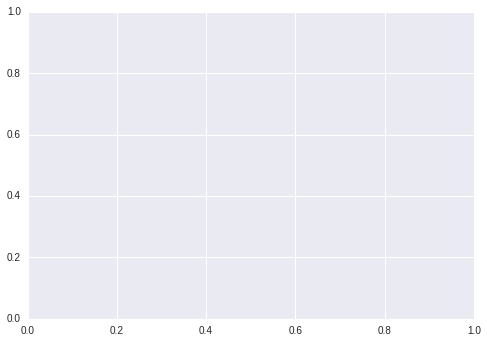

In [18]:
plot_pendulum(0.5, 0.0, 0.0)

Use `interact` to explore the `plot_pendulum` function with:

* `a`: a float slider over the interval $[0.0,1.0]$ with steps of $0.1$.
* `b`: a float slider over the interval $[0.0,10.0]$ with steps of $0.1$.
* `omega0`: a float slider over the interval $[0.0,10.0]$ with steps of $0.1$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Use your interactive plot to explore the behavior of the damped, driven pendulum by varying the values of $a$, $b$ and $\omega_0$.

* First start by increasing $a$ with $b=0$ and $\omega_0=0$.
* Then fix $a$ at a non-zero value and start to increase $b$ and $\omega_0$.

Describe the different *classes* of behaviors you observe below.

YOUR ANSWER HERE